In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
data = pd.read_csv('train.csv')


In [4]:
data

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,6315681217727103413,0,14102100,1005,1,43d6df75,27e3c518,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,aff0d6fe,13472f46,1,0,15706,320,50,1722,0,35,100084,79
1,11499442598414072625,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,1087b12b,6332421a,1,0,15702,320,50,1722,0,35,-1,79
2,16984591199385708211,0,14102100,1010,1,85f751fd,c4e18dd6,50e219e0,8c0dcd5a,7801e8d9,0f2161f8,291f9e3f,db44a941,f07e20f8,4,0,21665,320,50,2493,3,35,-1,117
3,1398520871517463641,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,39947756,2347f47a,cef3e649,05d6f5ef,7bac0c49,78d9bd10,1,2,1266,320,50,196,3,303,100130,15
4,15805575503129354005,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,d32f4923,a0f5f879,1,0,15707,320,50,1722,0,35,-1,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,5016404011898773657,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,54c5d545,2347f47a,0f2161f8,b7de1b3e,c8b923f0,cd5b1559,1,2,21611,320,50,2480,3,297,100111,61
74996,15883418978980017747,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,c596e44c,d787e91b,1,0,15708,320,50,1722,0,35,100084,79
74997,1628301395447050370,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,6fc85e22,7801e8d9,0f2161f8,a99f214a,d6eb9bd3,6ae7fb43,1,0,20596,320,50,2161,0,35,-1,157
74998,1122429394954621979,0,14102100,1010,1,85f751fd,c4e18dd6,50e219e0,a4e8d9a8,7801e8d9,0f2161f8,2f21268d,189637cb,5b29a934,4,2,20366,320,50,2333,0,39,-1,157


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                75000 non-null  uint64
 1   click             75000 non-null  int64 
 2   hour              75000 non-null  int64 
 3   C1                75000 non-null  int64 
 4   banner_pos        75000 non-null  int64 
 5   site_id           75000 non-null  object
 6   site_domain       75000 non-null  object
 7   site_category     75000 non-null  object
 8   app_id            75000 non-null  object
 9   app_domain        75000 non-null  object
 10  app_category      75000 non-null  object
 11  device_id         75000 non-null  object
 12  device_ip         75000 non-null  object
 13  device_model      75000 non-null  object
 14  device_type       75000 non-null  int64 
 15  device_conn_type  75000 non-null  int64 
 16  C14               75000 non-null  int64 
 17  C15         

In [6]:
data.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,7.500000e+04,75000.000000,75000.0,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.00000,75000.000000
mean,9.486088e+18,0.174987,14102100.0,1005.033053,0.198880,1.054560,0.198387,17671.736973,318.371680,56.742693,1962.769880,0.790413,132.468560,37730.66776,88.400813
std,5.676217e+18,0.379958,0.0,1.083490,0.402685,0.579483,0.634493,3242.866559,11.758177,36.756353,395.453854,1.224614,245.345762,48510.04012,45.442656
min,3.237563e+13,0.000000,14102100.0,1001.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.00000,13.000000
25%,4.162293e+18,0.000000,14102100.0,1005.000000,0.000000,1.000000,0.000000,15704.000000,320.000000,50.000000,1722.000000,0.000000,35.000000,-1.00000,61.000000
50%,1.073188e+19,0.000000,14102100.0,1005.000000,0.000000,1.000000,0.000000,17654.000000,320.000000,50.000000,1993.000000,0.000000,35.000000,-1.00000,79.000000
75%,1.456610e+19,0.000000,14102100.0,1005.000000,0.000000,1.000000,0.000000,20362.000000,320.000000,50.000000,2295.000000,2.000000,39.000000,100083.00000,156.000000
max,1.844664e+19,1.000000,14102100.0,1010.000000,5.000000,5.000000,5.000000,21705.000000,728.000000,480.000000,2497.000000,3.000000,1835.000000,100248.00000,157.000000


In [7]:
data.isnull().sum()

id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

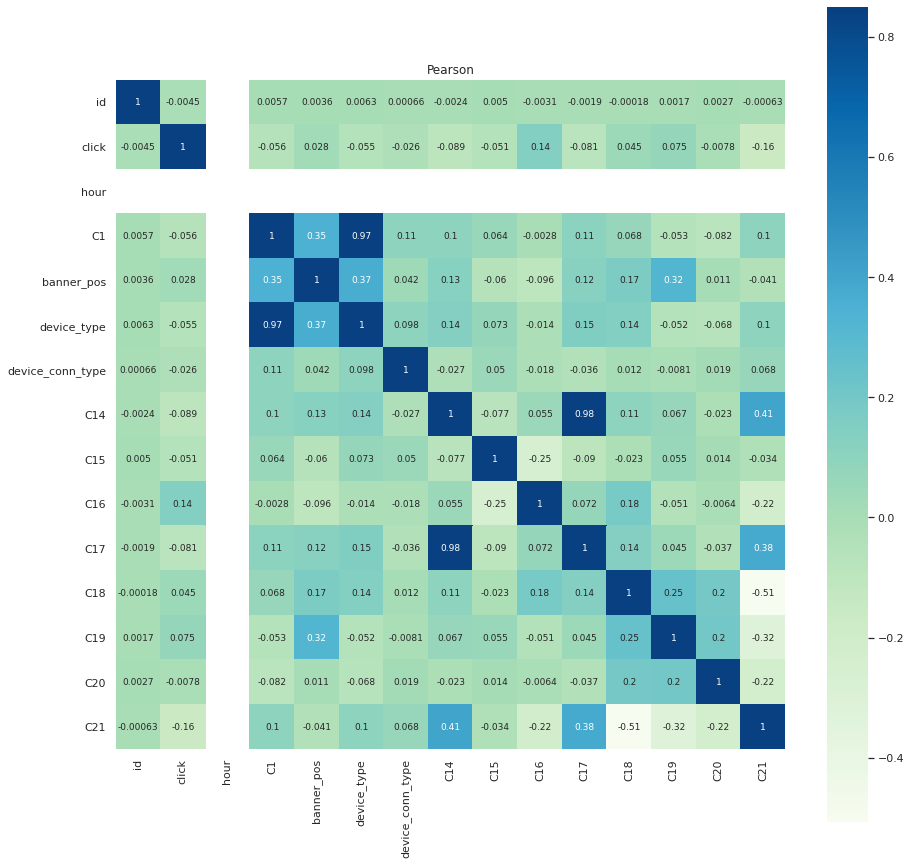

In [8]:
sns.set(style='whitegrid', font_scale=1)
plt.figure(figsize=(15,15))
plt.title('Pearson')
sns.heatmap(data.corr(),vmax=0.85, square=True,cmap='GnBu', linecolor='b',annot=True,annot_kws={"size":9})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa084b8a10>,
      dtype=object)

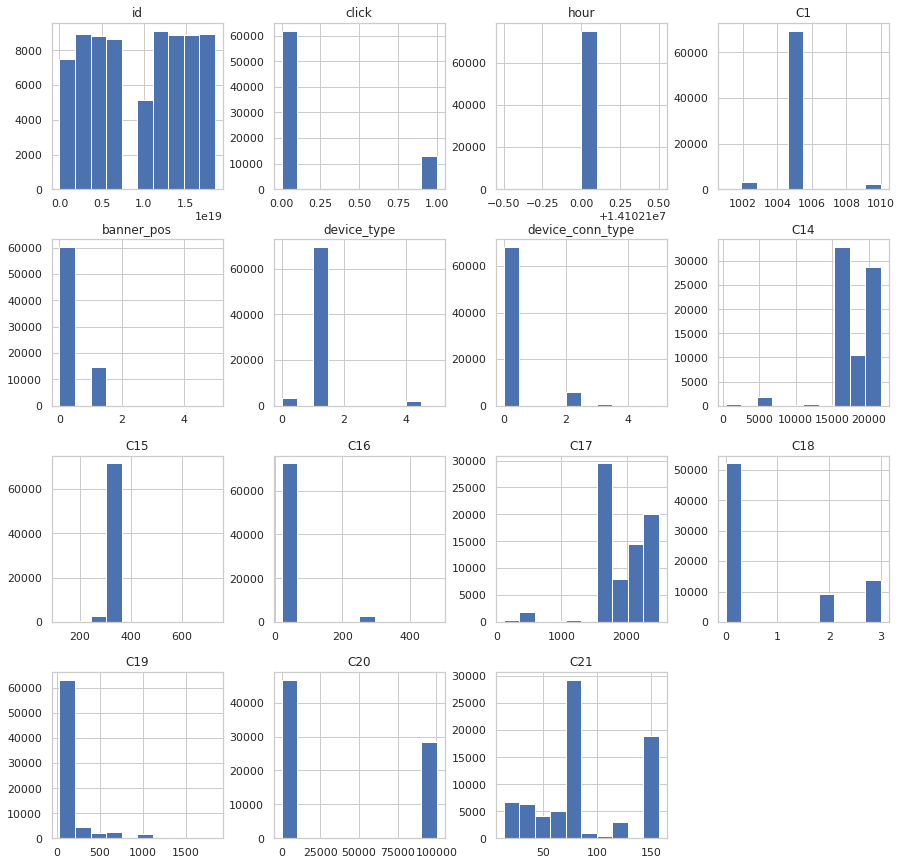

In [9]:
data.hist(figsize=(15,15))

In [10]:
data = data.drop('id',axis=1)
data

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,14102100,1005,1,43d6df75,27e3c518,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,aff0d6fe,13472f46,1,0,15706,320,50,1722,0,35,100084,79
1,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,1087b12b,6332421a,1,0,15702,320,50,1722,0,35,-1,79
2,0,14102100,1010,1,85f751fd,c4e18dd6,50e219e0,8c0dcd5a,7801e8d9,0f2161f8,291f9e3f,db44a941,f07e20f8,4,0,21665,320,50,2493,3,35,-1,117
3,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,39947756,2347f47a,cef3e649,05d6f5ef,7bac0c49,78d9bd10,1,2,1266,320,50,196,3,303,100130,15
4,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,d32f4923,a0f5f879,1,0,15707,320,50,1722,0,35,-1,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,54c5d545,2347f47a,0f2161f8,b7de1b3e,c8b923f0,cd5b1559,1,2,21611,320,50,2480,3,297,100111,61
74996,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,c596e44c,d787e91b,1,0,15708,320,50,1722,0,35,100084,79
74997,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,6fc85e22,7801e8d9,0f2161f8,a99f214a,d6eb9bd3,6ae7fb43,1,0,20596,320,50,2161,0,35,-1,157
74998,0,14102100,1010,1,85f751fd,c4e18dd6,50e219e0,a4e8d9a8,7801e8d9,0f2161f8,2f21268d,189637cb,5b29a934,4,2,20366,320,50,2333,0,39,-1,157


In [11]:
#pre procesamiento de valores no numericos
le = LabelEncoder()
for col in ['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_model',
            'device_id', 'device_ip']:
    le.fit(list(data[col]))
    data[col] = le.transform(data[col])

In [12]:
data

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,14102100,1005,1,225,105,2,594,23,0,3925,23063,166,1,0,15706,320,50,1722,0,35,100084,79
1,1,14102100,1005,0,93,664,2,594,23,0,3925,2088,898,1,0,15702,320,50,1722,0,35,-1,79
2,0,14102100,1010,1,433,531,6,353,23,2,1006,28747,2151,4,0,21665,320,50,2493,3,35,-1,117
3,0,14102100,1005,0,433,531,6,135,6,13,147,16147,1085,1,2,1266,320,50,196,3,303,100130,15
4,0,14102100,1005,0,93,664,2,594,23,0,3925,27714,1448,1,0,15707,320,50,1722,0,35,-1,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0,14102100,1005,0,433,531,6,218,6,2,4246,26323,1847,1,2,21611,320,50,2480,3,297,100111,61
74996,0,14102100,1005,0,93,664,2,594,23,0,3925,25913,1944,1,0,15708,320,50,1722,0,35,100084,79
74997,0,14102100,1005,0,433,531,6,285,23,2,3925,28198,965,1,0,20596,320,50,2161,0,35,-1,157
74998,0,14102100,1010,1,433,531,6,418,23,2,1148,3194,826,4,2,20366,320,50,2333,0,39,-1,157


In [13]:
scaler = MinMaxScaler()
dt_variables_cont = ['C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']
data[dt_variables_cont] = scaler.fit_transform(data[dt_variables_cont])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   click             75000 non-null  int64  
 1   hour              75000 non-null  int64  
 2   C1                75000 non-null  float64
 3   banner_pos        75000 non-null  float64
 4   site_id           75000 non-null  int64  
 5   site_domain       75000 non-null  int64  
 6   site_category     75000 non-null  int64  
 7   app_id            75000 non-null  int64  
 8   app_domain        75000 non-null  int64  
 9   app_category      75000 non-null  int64  
 10  device_id         75000 non-null  int64  
 11  device_ip         75000 non-null  int64  
 12  device_model      75000 non-null  int64  
 13  device_type       75000 non-null  float64
 14  device_conn_type  75000 non-null  float64
 15  C14               75000 non-null  float64
 16  C15               75000 non-null  float6

In [15]:
data.describe()

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,75000.000000,75000.0,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.00000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000
mean,0.174987,14102100.0,0.448117,0.039776,309.391347,502.458973,5.828627,544.419960,22.074347,1.085573,3796.079693,16672.233667,1158.24372,0.210912,0.039677,0.810911,0.326269,0.079875,0.776004,0.263471,0.055199,0.376379,0.523617
std,0.379958,0.0,0.120388,0.080537,218.815206,181.590106,4.467752,136.534437,5.866076,3.222858,690.772773,9584.920753,637.78317,0.115897,0.126899,0.152033,0.019339,0.079905,0.165809,0.408205,0.136152,0.483896,0.315574
min,0.000000,14102100.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,14102100.0,0.444444,0.000000,93.000000,416.000000,2.000000,594.000000,23.000000,0.000000,3925.000000,8666.000000,579.00000,0.200000,0.000000,0.718659,0.328947,0.065217,0.675052,0.000000,0.001110,0.000000,0.333333
50%,0.000000,14102100.0,0.444444,0.000000,288.000000,531.000000,4.000000,594.000000,23.000000,0.000000,3925.000000,16412.500000,1196.50000,0.200000,0.000000,0.810080,0.328947,0.065217,0.788679,0.000000,0.001110,0.000000,0.458333
75%,0.000000,14102100.0,0.444444,0.000000,433.000000,664.000000,6.000000,594.000000,23.000000,0.000000,3925.000000,24969.000000,1726.00000,0.200000,0.000000,0.937037,0.328947,0.065217,0.915304,0.666667,0.003330,0.998354,0.993056
max,1.000000,14102100.0,1.000000,1.000000,810.000000,696.000000,15.000000,641.000000,51.000000,17.000000,5808.000000,33512.000000,2302.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
data

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,14102100,0.444444,0.2,225,105,2,594,23,0,3925,23063,166,0.2,0.0,0.718753,0.328947,0.065217,0.675052,0.0,0.001110,0.998364,0.458333
1,1,14102100,0.444444,0.0,93,664,2,594,23,0,3925,2088,898,0.2,0.0,0.718565,0.328947,0.065217,0.675052,0.0,0.001110,0.000000,0.458333
2,0,14102100,1.000000,0.2,433,531,6,353,23,2,1006,28747,2151,0.8,0.0,0.998125,0.328947,0.065217,0.998323,1.0,0.001110,0.000000,0.722222
3,0,14102100,0.444444,0.0,433,531,6,135,6,13,147,16147,1085,0.2,0.4,0.041772,0.328947,0.065217,0.035220,1.0,0.149834,0.998823,0.013889
4,0,14102100,0.444444,0.0,93,664,2,594,23,0,3925,27714,1448,0.2,0.0,0.718800,0.328947,0.065217,0.675052,0.0,0.001110,0.000000,0.458333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0,14102100,0.444444,0.0,433,531,6,218,6,2,4246,26323,1847,0.2,0.4,0.995593,0.328947,0.065217,0.992872,1.0,0.146504,0.998633,0.333333
74996,0,14102100,0.444444,0.0,93,664,2,594,23,0,3925,25913,1944,0.2,0.0,0.718847,0.328947,0.065217,0.675052,0.0,0.001110,0.998364,0.458333
74997,0,14102100,0.444444,0.0,433,531,6,285,23,2,3925,28198,965,0.2,0.0,0.948008,0.328947,0.065217,0.859119,0.0,0.001110,0.000000,1.000000
74998,0,14102100,1.000000,0.2,433,531,6,418,23,2,1148,3194,826,0.8,0.4,0.937225,0.328947,0.065217,0.931237,0.0,0.003330,0.000000,1.000000


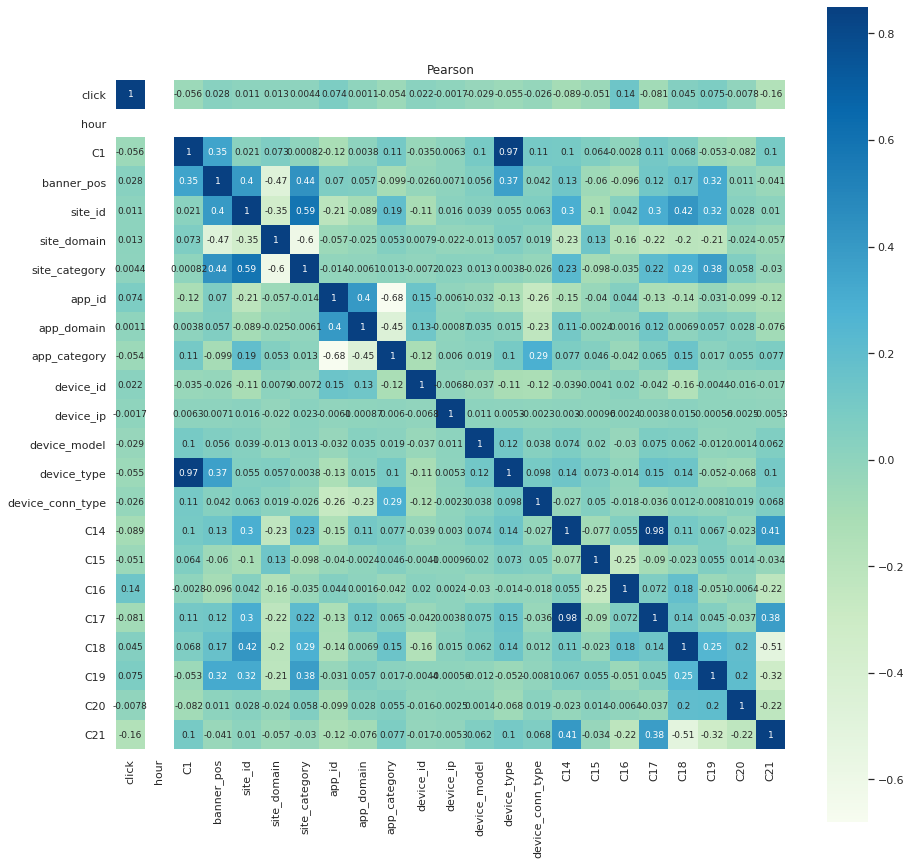

In [17]:
sns.set(style='whitegrid', font_scale=1)
plt.figure(figsize=(15,15))
plt.title('Pearson')
sns.heatmap(data.corr(),vmax=0.85, square=True,cmap='GnBu', linecolor='b',annot=True,annot_kws={"size":9})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa099a8290>,
      dtype=object)

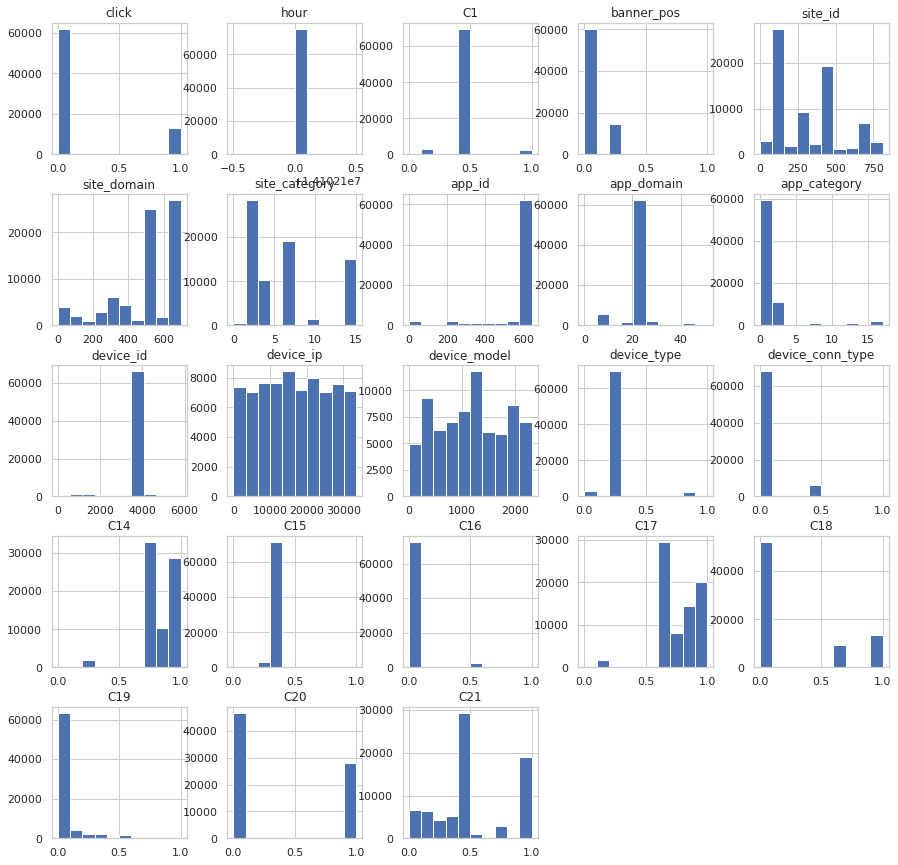

In [18]:
data.hist(figsize=(15,15))

In [19]:
X = data.drop('click', axis=1)
y = data['click']

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   click             75000 non-null  int64  
 1   hour              75000 non-null  int64  
 2   C1                75000 non-null  float64
 3   banner_pos        75000 non-null  float64
 4   site_id           75000 non-null  int64  
 5   site_domain       75000 non-null  int64  
 6   site_category     75000 non-null  int64  
 7   app_id            75000 non-null  int64  
 8   app_domain        75000 non-null  int64  
 9   app_category      75000 non-null  int64  
 10  device_id         75000 non-null  int64  
 11  device_ip         75000 non-null  int64  
 12  device_model      75000 non-null  int64  
 13  device_type       75000 non-null  float64
 14  device_conn_type  75000 non-null  float64
 15  C14               75000 non-null  float64
 16  C15               75000 non-null  float6

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 10)

In [22]:
model = Sequential()
model.add(Dense(20,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [36]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=90,verbose=1)

Epoch 1/90
5250/5250 [==============================] - 11s 2ms/step - loss: 7157.2638 - accuracy: 0.7141 - val_loss: 8184.4780 - val_accuracy: 0.8256
Epoch 2/90
5250/5250 [==============================] - 10s 2ms/step - loss: 2257.5730 - accuracy: 0.7156 - val_loss: 0.4918 - val_accuracy: 0.8256
Epoch 3/90
5250/5250 [==============================] - 9s 2ms/step - loss: 0.4754 - accuracy: 0.8231 - val_loss: 0.4629 - val_accuracy: 0.8256
Epoch 4/90
5250/5250 [==============================] - 10s 2ms/step - loss: 0.4660 - accuracy: 0.8236 - val_loss: 0.4629 - val_accuracy: 0.8256
Epoch 5/90
5250/5250 [==============================] - 9s 2ms/step - loss: 0.4613 - accuracy: 0.8266 - val_loss: 0.4629 - val_accuracy: 0.8256
Epoch 6/90
5250/5250 [==============================] - 9s 2ms/step - loss: 0.4636 - accuracy: 0.8251 - val_loss: 0.4629 - val_accuracy: 0.8256
Epoch 7/90
5250/5250 [==============================] - 9s 2ms/step - loss: 0.4652 - accuracy: 0.8241 - val_loss: 0.4629 - v

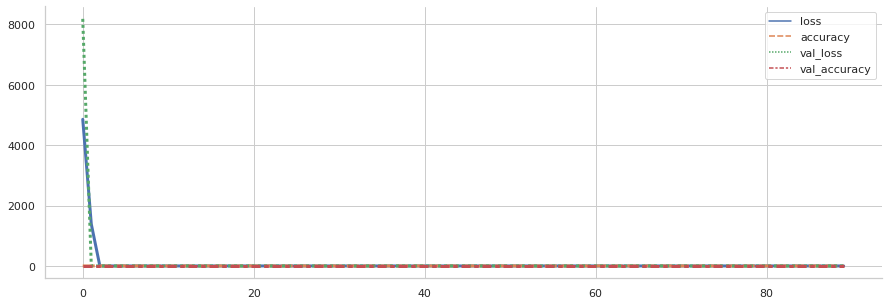

In [37]:
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
sns.despine()

In [24]:
# Tree Model
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 10)
tree.fit(X_train,y_train)
print('Train Score:',tree.score(X_train,y_train))
print('Test Score:',tree.score(X_test,y_test))

Train Score: 0.8388380952380953
Test Score: 0.8242666666666667


In [25]:
from sklearn.metrics import roc_curve,confusion_matrix,precision_score,recall_score,roc_auc_score
y_score = tree.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])
roc_auc_score = roc_auc_score(y_test,y_score[:,1])
print(roc_auc_score)

0.6994037325012215


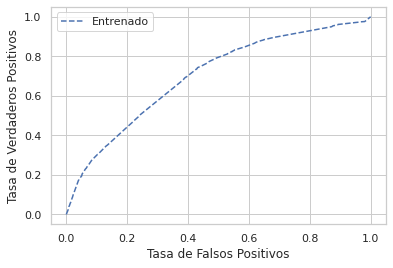

In [35]:
from matplotlib import pyplot
pyplot.plot(fpr, tpr, linestyle='--', label='Entrenado')
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

In [26]:
y_pred = tree.predict(X_test)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
print("Precision: %s, Recall: %s" %(precision, recall))

Precision: 0.7758365101279684, Recall: 0.8242666666666667


In [27]:
matrix = confusion_matrix(y_test,y_pred)
tn, fp, fn, tp = matrix.ravel()
print(matrix)

[[18134   441]
 [ 3513   412]]


In [30]:
for max_depth_val in [2, 3, 5, 10, 15, 20]:
    clf = DecisionTreeClassifier(max_depth = max_depth_val)
    print("Evaluating tree with max_depth = %s" %(max_depth_val))
    y_pred = tree.fit(X_train,y_train).predict(X_test) 
    print("Confusion matrix: ")
    print(confusion_matrix(y_test, y_pred))
    prec = precision_score(y_test, y_pred, average = 'weighted')
    recall = recall_score(y_test, y_pred, average = 'weighted')
    print("Precision: %s, Recall: %s" %(prec, recall))

Evaluating tree with max_depth = 2
Confusion matrix: 
[[18136   439]
 [ 3513   412]]
Precision: 0.7760469057263968, Recall: 0.8243555555555555
Evaluating tree with max_depth = 3
Confusion matrix: 
[[18140   435]
 [ 3514   411]]
Precision: 0.7763326568876818, Recall: 0.8244888888888889
Evaluating tree with max_depth = 5
Confusion matrix: 
[[18134   441]
 [ 3514   411]]
Precision: 0.7756987095852605, Recall: 0.8242222222222222
Evaluating tree with max_depth = 10
Confusion matrix: 
[[18136   439]
 [ 3515   410]]
Precision: 0.775771030740956, Recall: 0.8242666666666667
Evaluating tree with max_depth = 15
Confusion matrix: 
[[18136   439]
 [ 3517   408]]
Precision: 0.775494166426013, Recall: 0.8241777777777778
Evaluating tree with max_depth = 20
Confusion matrix: 
[[18137   438]
 [ 3516   409]]
Precision: 0.7757382486997111, Recall: 0.8242666666666667


In [29]:
from sklearn.model_selection import KFold,cross_val_score
for max_depth_val in [3, 5, 10, 15, 20]:
    k_fold = KFold(n_splits = 4)
    clf = DecisionTreeClassifier(max_depth = max_depth_val)
    print("Evluando Decision Tree for max_depth = %s" %(max_depth_val))
    y_pred = tree.fit(X_train, y_train).predict(X_test) 
  
    cv_precision = cross_val_score(clf, X_train, y_train, cv = k_fold, scoring = 'recall_weighted')
    precision = recall_score(y_test, y_pred, average = 'weighted')
    print("Cross validation Recall: %s" %(cv_precision.mean()))
    print("Test Recall: %s" %(precision.mean()))

Evluando Decision Tree for max_depth = 3
Cross validation Recall: 0.8263428571428572
Test Recall: 0.8241777777777778
Evluando Decision Tree for max_depth = 5
Cross validation Recall: 0.8252761904761905
Test Recall: 0.8242222222222222
Evluando Decision Tree for max_depth = 10
Cross validation Recall: 0.8219047619047619
Test Recall: 0.8244444444444444
Evluando Decision Tree for max_depth = 15
Cross validation Recall: 0.8089333333333333
Test Recall: 0.8241333333333334
Evluando Decision Tree for max_depth = 20
Cross validation Recall: 0.7912190476190476
Test Recall: 0.8241777777777778
